# Analysing the performance of the two attacks - Fader Network based, CW-L$_\infty$

In [4]:
import os
import json
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from functools import reduce
import scipy as sp

In [35]:
sns.set_context("paper", font_scale=1.5)

## Fader network attack

In [36]:
f = open('output-chubby-eye-pale/vals.csv', mode='r')

In [37]:
outputs = []
for line in f:
    tmp = json.loads(line)
    outputs.append(tmp)

In [38]:
accuracy = reduce((lambda x,y: x+y), [i['success'] for i in outputs])/float(len(outputs))

In [39]:
print('Accuracy for Fader Network attack: {:.3f}'.format(accuracy))

Accuracy for Fader Network attack: 0.978


In [40]:
logit_diffs = []
for i in outputs:
    #print(np.asarray(i['orig_logits']))
    if i['success'] == 1:
        logit_d = np.linalg.norm(np.asarray(i['orig_logits']) - np.asarray(i['logits']))
        logit_diffs.append(logit_d)

In [41]:
logit_diffs = np.asarray(logit_diffs)

**Histogram of distances between logits of original image and that of adversarial image** 

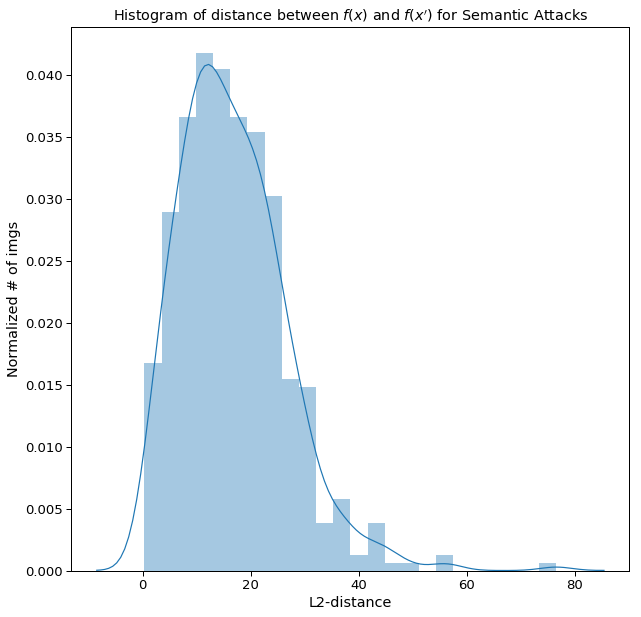

In [85]:
plt.figure(figsize=(10, 10))
plt.title('Histogram of distance between $f(x)$ and $f(x\')$ for Semantic Attacks')
plt.xlabel('L2-distance')
plt.ylabel('Normalized # of imgs')
sns.distplot(logit_diffs)

## Carlini-Wagner L$_\infty$ attack $\varepsilon = 0.02$

In [44]:
f1 = open('outputs_cw_0005/vals.csv', mode='r')

In [45]:
outputs_cw = []
for line in f1:
    tmp = json.loads(line)
    outputs_cw.append(tmp)

In [46]:
acc_cw = reduce((lambda x,y:x+y), [i['success'] for i in outputs_cw])/float(len(outputs_cw))

In [47]:
print('Accuracy CW-L2 attack:{:.3f}'.format(acc_cw))

Accuracy CW-L2 attack:0.880


In [48]:
logit_diffs_cw = []
for i in outputs_cw:
    #print(np.asarray(i['orig_logits']))
    if i['success'] == 1:
        logit_d = np.linalg.norm(np.asarray(i['orig_logits']) - np.asarray(i['logits']))
        logit_diffs_cw.append(logit_d)

In [86]:
logit_diffs_cw = np.asarray(logit_diffs_cw)

**Histogram of distances between logits of original image and CW-L2 adversarial image**

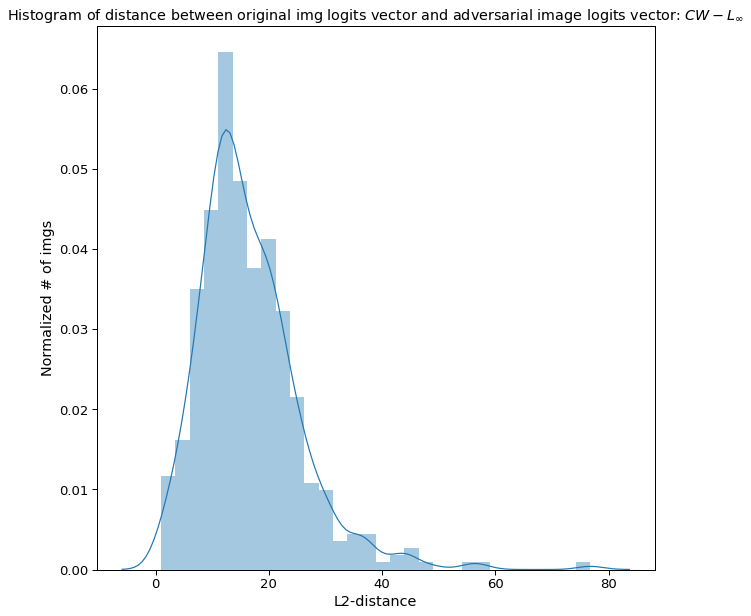

In [80]:
plt.figure(figsize=(10, 10))
plt.title('Histogram of distance between original img logits vector and adversarial image logits vector: $CW-L_\infty$')
plt.xlabel('L2-distance')
plt.ylabel('Normalized # of imgs')
sns.distplot(logit_diffs_cw)

In [51]:
f2 = open('outputs_cw/vals_bkup.json', 'r')
outputs_cw_2 = []
for line in f2:
    tmp = json.loads(line)
    outputs_cw_2.append(tmp)
logit_diffs_cw_2 = []
for i in outputs_cw_2:
    #print(np.asarray(i['orig_logits']))
    if i['success'] == 1:
        logit_d = np.linalg.norm(np.asarray(i['orig_logits']) - np.asarray(i['logits']))
        logit_diffs_cw_2.append(logit_d)

## Comparison plots

In [52]:
x = []
y = []
k = []
z = []
for cw, cw2, fn in zip(outputs_cw, outputs_cw_2, outputs):
    if cw['success'] and cw2['success'] and fn['success']:
        cw_dist = np.linalg.norm(np.array(cw['orig_logits']) - np.array(cw['logits']))
        fn_dist = np.linalg.norm(np.array(fn['orig_logits']) - np.array(fn['logits']))
        
        orig_dist = np.linalg.norm(np.array(fn['orig_logits']))
        #print(cw_dist, fn_dist)
        x.append(fn_dist)
        y.append(cw_dist)
        z.append(orig_dist)

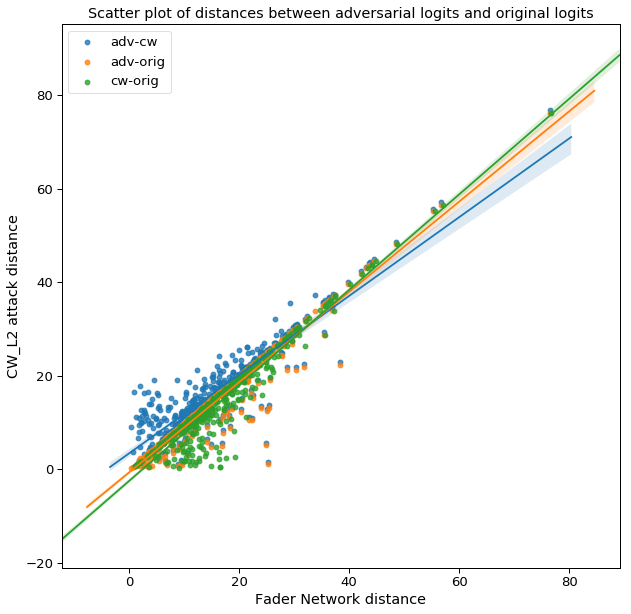

In [53]:
x = np.asarray(x)
y = np.asarray(y)
plt.figure(figsize=(10,10))
plt.title('Scatter plot of distances between adversarial logits and original logits')
plt.xlabel('Fader Network distance')
plt.ylabel('CW_L2 attack distance')
sns.regplot(x,y, label='adv-cw')
sns.regplot(x,z, label='adv-orig')
sns.regplot(y,z, label='cw-orig')
plt.legend()

In [54]:
x[:5], y[:5]

(array([ 8.34281584, 11.91805114, 20.32890867,  4.35014775, 30.39534661]),
 array([11.47914508, 15.79474728, 22.2613429 ,  8.70287963, 30.56779618]))

## Statistical comparison of distances

For Fader Network attack

In [55]:
sp.stats.describe(logit_diffs)

DescribeResult(nobs=490, minmax=(0.34742746778477007, 76.55352184529858), mean=16.765744993353344, variance=98.04070463960564, skewness=1.1536741207186025, kurtosis=3.1285875213879883)

For CW-$L_\infty$ attack

In [56]:
sp.stats.describe(logit_diffs_cw)

DescribeResult(nobs=441, minmax=(0.9807149572483531, 76.78671973547515), mean=16.567599428638143, variance=81.93781464932852, skewness=1.6388107031890855, kurtosis=5.8737125959201055)

# Original logits

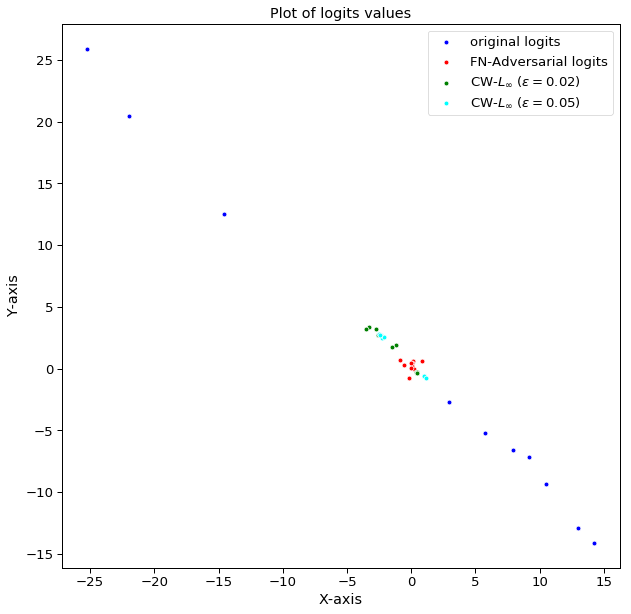

In [88]:
orig_logits = np.array([i['orig_logits'] for i in outputs])
adv_logits = np.array([i['logits'] for i in outputs])
adv_cw_logits = np.array([i['logits'] for i in outputs_cw])
adv_cw2_logits = np.array([i['logits'] for i in outputs_cw_2])
plt.figure(figsize=(10,10))
#fig, ax = plt.subplots(figsize=(10,10))
plt.title('Plot of logits values')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
sns.scatterplot(x=orig_logits[:10,0], y=orig_logits[:10,1], color='blue', label='original logits')
sns.scatterplot(x=adv_logits[:10,0], y=adv_logits[:10,1], color='red', label='FN-Adversarial logits')
sns.scatterplot(x=adv_cw_logits[:10,0], y=adv_cw_logits[:10,1], color='green', label='CW-$L_\infty$ ($ \epsilon=0.02 $)')
sns.scatterplot(x=adv_cw2_logits[:10,0], y=adv_cw2_logits[:10,1], color='cyan', label='CW-$L_\infty$ ($ \epsilon=0.05 $)')

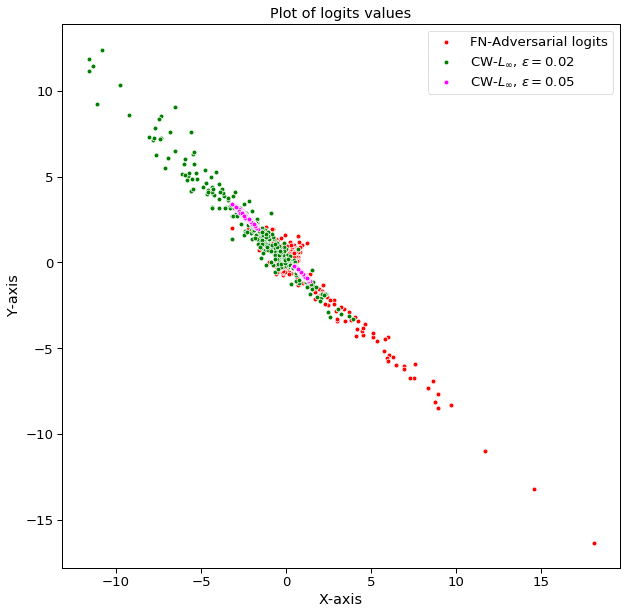

In [74]:
adv_logits = np.array([i['logits'] for i in outputs])
adv_cw_logits = np.array([i['logits'] for i in outputs_cw])
adv_cw_2_logits = np.array([i['logits'] for i in outputs_cw_2])
plt.figure(figsize=(10,10))
#fig, ax = plt.subplots(figsize=(10,10))
plt.title('Plot of logits values')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
#sns.scatterplot(x=orig_logits[:,0], y=orig_logits[:,1], color='blue', label='original logits')
sns.scatterplot(x=adv_logits[:,0], y=adv_logits[:,1], color='red', label='FN-Adversarial logits')
sns.scatterplot(x=adv_cw_logits[:,0], y=adv_cw_logits[:,1], color='green', label='CW-$L_\infty$, $\epsilon=0.02$')
sns.scatterplot(x=adv_cw_2_logits[:,0], y=adv_cw_2_logits[:,1], color='magenta', label='CW-$L_\infty$, $\epsilon=0.05$')

## Optimization pathway

In [59]:
f2 = open('outputs_cw_0005/vals.csv','r')

In [60]:
l_arrays = []
new_logits = []
orig_logits = []
for line in f2:
    tmp = json.loads(line)
    new_logits.append(tmp['logits'])
    orig_logits.append(tmp['orig_logits'])
    l_arrays.append(tmp['logit_array'])

In [61]:
new_logits = np.asarray(new_logits)
orig_logits = np.asarray(orig_logits)

In [62]:
new_logits

array([[-2.59243488,  2.70490217],
       [-2.76381826,  3.19428897],
       [-1.21929872,  1.88437164],
       ...,
       [-2.02560043,  2.11136246],
       [-2.27409554,  1.79733491],
       [-1.43754435,  1.77134669]])

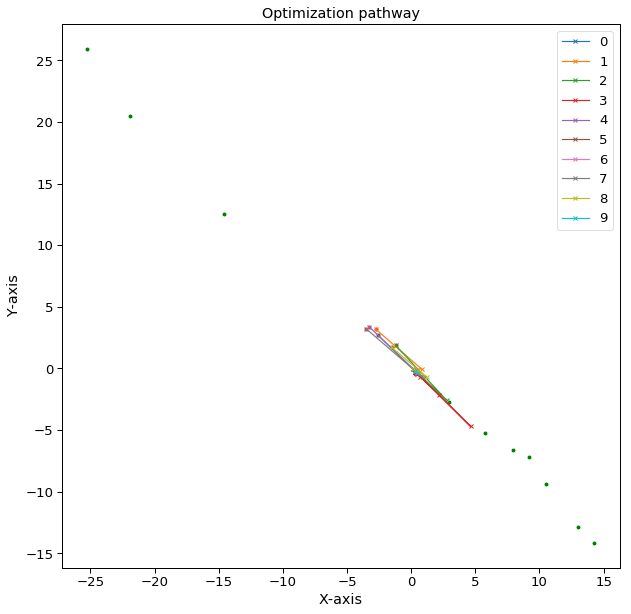

In [72]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=new_logits[:10,0], y=new_logits[:10,1], color='red')
sns.scatterplot(x=orig_logits[:10,0], y=orig_logits[:10,1], color='green')
plt.title('Optimization pathway')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
for idx, arr in enumerate(l_arrays[:10]):
    arr = np.array(arr)
    arr = arr.reshape(arr.shape[0], arr.shape[2])
    plt.plot(arr[:,0], arr[:,1], label=idx, linestyle='-', marker='x')
plt.legend()

In [69]:
orig_logits[:2], new_logits[:2]

(array([[ 5.72002411, -5.21177626],
        [ 9.15974808, -7.16440821]]), array([[-2.59243488,  2.70490217],
        [-2.76381826,  3.19428897]]))

In [70]:
l_arrays[0][0], l_arrays[1][4]

IndexError: list index out of range

## 

In [71]:
for i,j,k in zip(x, y, z):
    print(i,j,k)

8.342815844226353 11.479145082993131 7.738300042948787
11.918051138546486 15.794747275009453 11.628831832861026
20.32890867311475 22.26134289776397 20.063725016134377
4.35014774609568 8.702879634137606 4.007395180194288
30.39534660508599 30.567796184374465 30.02228112657222
19.39972407680529 19.723719746584987 19.1902732466666
15.252428813706304 18.893289882849366 14.112730862289553
10.360871042338434 12.614787436563368 10.354169380343443
36.319452964981565 36.74222872369081 36.18914179155558
11.349778111537642 7.512939029717251 7.009299410269881
22.53092715140808 22.860384333638383 22.343277950304287
5.324529489037191 9.46433634810989 5.288866179290649
10.145141825973917 12.142189384992324 10.097795174052022
12.980054908419904 11.072503596861527 10.515717496459994
20.384688583003378 12.799986028761971 12.256998302481323
9.659811724510847 1.3723019663840368 0.8516886540498831
14.050363195189695 14.16264842883475 14.009681848379007
10.880255119420214 14.169410590157955 10.25785659279377